### ENERGY FORECASTING IN FUEL CELL

##### 1. Problem Statement

to predict the Energy consumption in Fuel Cell

##### 2. Data Collection

Link https://ieee-dataport.org/competitions/energy-forecasting-fuel-cell

2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
import calendar

##### Import the CSV data as panda dataframe

In [43]:
cd FuelCellPower/

/Users/abdulrasheed/Desktop/FuelCellPower


In [198]:
df = pd.read_csv('data/Fuel Cell.csv')

In [199]:
df.shape

(43797, 2)

##### 2.2 Dataset Information

Datetime

Fuel Cell Power

#### 3. Data Checks to Perform

check Missing values

check duplicates

check data types

check the number of unique value in each column

check statistics of data

check various categories present in categorical column

##### 3.1 Check Missing Values

In [200]:
df.isna().sum()

Datetime            1
Fuel Cell Power     1
dtype: int64

##### 3.2 Check Duplicates values

In [201]:
df.duplicated().sum()

0

##### 3.3 Check Data types

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43797 entries, 0 to 43796
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Datetime          43796 non-null  object 
 1   Fuel Cell Power   43796 non-null  float64
dtypes: float64(1), object(1)
memory usage: 684.5+ KB


##### 3.4 Check Statistics of Data

In [203]:
df.describe()

,Fuel Cell Power
count,43796.000000
mean,1631.209152
std,297.607666
min,1014.000000
25%,1420.000000
50%,1596.000000
75%,1798.000000
max,2951.000000


### 4. Spliting Data 

In [205]:
# Convert Datetime column to pandas datetime
df["Datetime"] = pd.to_datetime(df["Datetime"], format="%d-%m-%Y %H:%M", errors="coerce")

# Extract date, month, year, and time
df["Date"] = df["Datetime"].dt.day
df["Month"] = df["Datetime"].dt.month
df["Year"] = df["Datetime"].dt.year
df["Time"] = df["Datetime"].dt.time
df["Power"] = df['Fuel Cell Power ']

# Drop original Datetime column
df = df.drop(columns=['Fuel Cell Power '])



In [209]:
df["Time"] = df["Time"].astype(str)

print(df["Time"])


0        01:00:00
1        02:00:00
2        03:00:00
3        04:00:00
4        05:00:00
           ...   
43792    20:00:00
43793    21:00:00
43794    22:00:00
43795    23:00:00
43796    00:00:00
Name: Time, Length: 43797, dtype: object


In [210]:
df.drop(columns=['Datetime'], axis =1, inplace=True)

In [211]:
df["Date"] = df["Date"].fillna(31).astype(int)  # Fill missing values with 0 before conversion
df["Month"] = df["Month"].fillna(12).astype(int)
df["Year"] = df["Year"].fillna(2017).astype(int)
df["Power"] = df["Power"].fillna(1614).astype(int)



In [212]:
df["Month"] = df["Month"].map(lambda x: calendar.month_name[x] if pd.notna(x) else None)

In [213]:
df

,Date,Month,Year,Time,Power
0,31,December,2017,01:00:00,1556
1,31,December,2017,02:00:00,1509
2,31,December,2017,03:00:00,1479
3,31,December,2017,04:00:00,1468
4,31,December,2017,05:00:00,1488
...,...,...,...,...,...
43792,1,January,2022,20:00:00,1565
43793,1,January,2022,21:00:00,1551
43794,1,January,2022,22:00:00,1500
43795,1,January,2022,23:00:00,1444


### 5. Exploring Data (Visualisation)

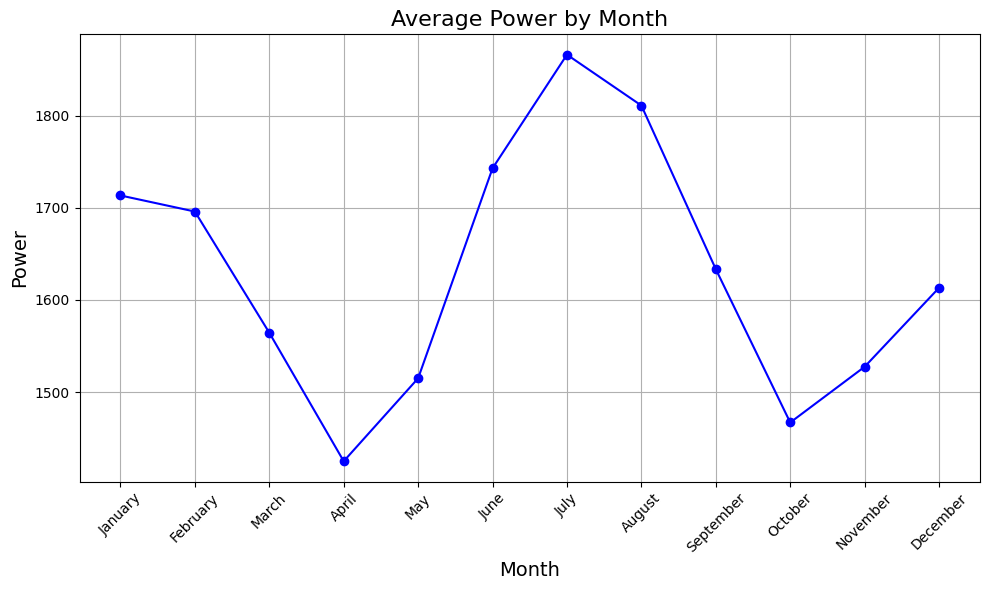

In [214]:
df_grouped = df.groupby("Month", sort=False)["Power"].mean().reset_index()
df_grouped["Month"] = pd.Categorical(df_grouped["Month"], categories=list(calendar.month_name[1:]), ordered=True)
df_grouped = df_grouped.sort_values("Month")
plt.figure(figsize=(10, 6))
plt.plot(df_grouped["Month"], df_grouped["Power"], marker='o', linestyle='-', color='b')
plt.title("Average Power by Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Power", fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

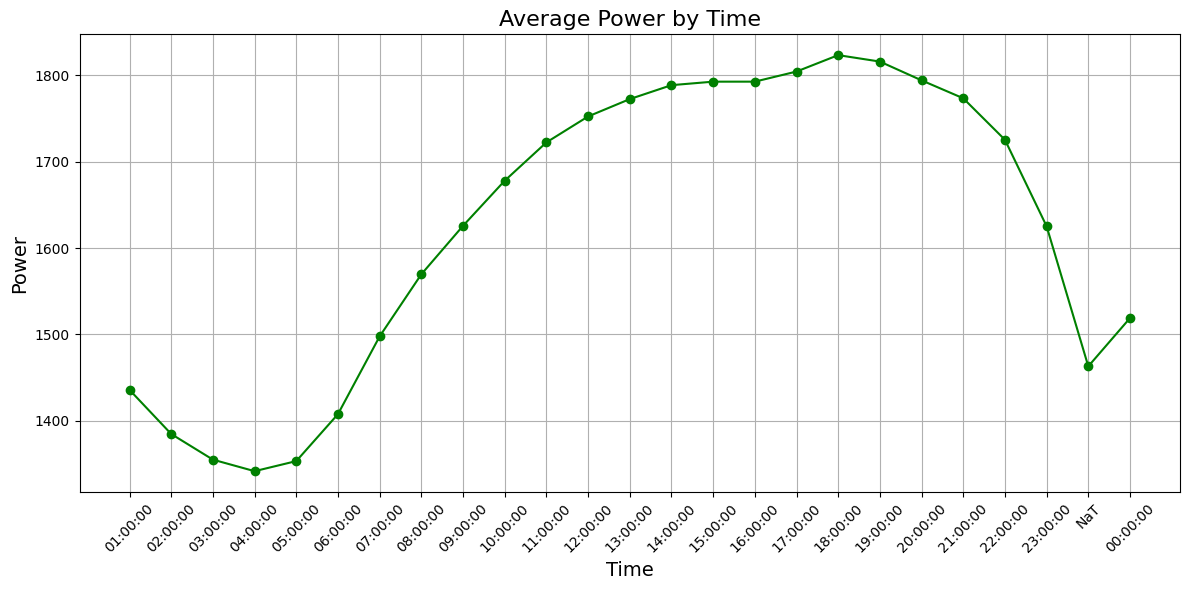

In [215]:
# Group by Time and calculate mean Power
df_grouped = df.groupby("Time", sort=False)["Power"].mean().reset_index()

df_grouped["Time"] = df_grouped["Time"].astype(str)

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(df_grouped["Time"], df_grouped["Power"], marker='o', linestyle='-', color='g')
plt.title("Average Power by Time", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Power", fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [216]:
# Identify rows with Year == 1900
incorrect_year_indices = df[df["Year"] == 1900].index

# Replace Year == 1900 with the preceding value
for index in incorrect_year_indices:
    if index > 0:  # Ensure it's not the first row
        df.loc[index, "Year"] = df.loc[index - 1, "Year"]

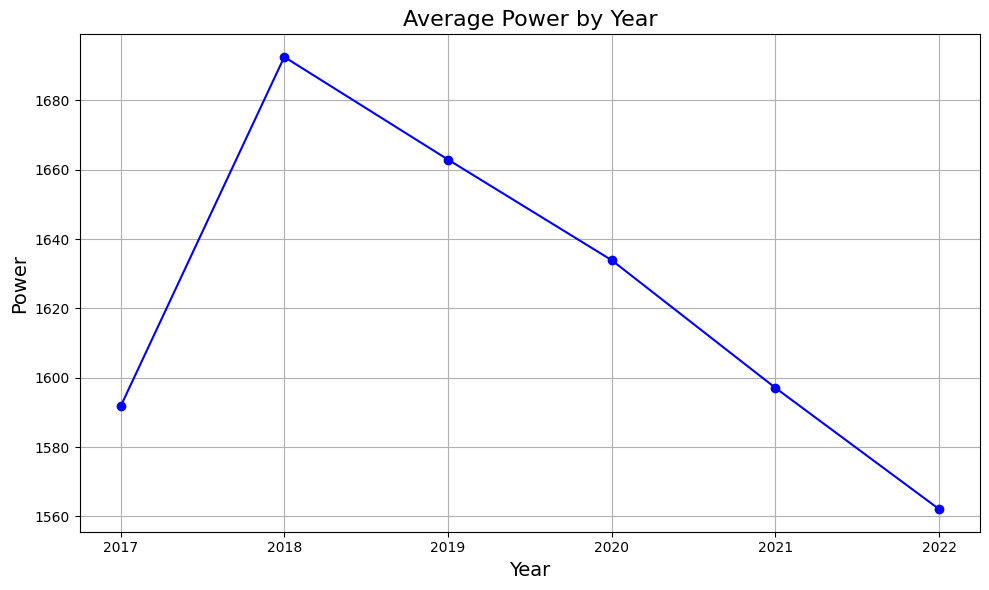

In [217]:
# Group by Year and calculate mean Power
df_grouped = df.groupby("Year", sort=False)["Power"].mean().reset_index()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(df_grouped["Year"], df_grouped["Power"], marker='o', linestyle='-', color='b')
plt.title("Average Power by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Power", fontsize=14)
plt.grid(True)
plt.xticks(df_grouped["Year"])
plt.tight_layout()
plt.show()

In [218]:
df[df['Year'] == 1900]

,Date,Month,Year,Time,Power


In [219]:
df.iloc[28485]

Date            2
Month     January
Year         2020
Time     00:00:00
Power        1528
Name: 28485, dtype: object

In [220]:
for i in range(2017, 2023):
    print(i, len(df[df['Year'] == i]))

2017 2233
2018 8757
2019 8760
2020 8761
2021 8759
2022 6527


In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,  AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor

In [235]:
df

,Date,Month,Year,Time,Power
0,31,December,2017,01:00:00,1556
1,31,December,2017,02:00:00,1509
2,31,December,2017,03:00:00,1479
3,31,December,2017,04:00:00,1468
4,31,December,2017,05:00:00,1488
...,...,...,...,...,...
43792,1,January,2022,20:00:00,1565
43793,1,January,2022,21:00:00,1551
43794,1,January,2022,22:00:00,1500
43795,1,January,2022,23:00:00,1444


In [237]:
for column in df.columns:
    print('column name: ', column)
    print(df[column].nunique())
    print(df[column].unique())
    print('-'*60)

column name:  Date
31
[31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8
  7  6  5  4  3  2  1]
------------------------------------------------------------
column name:  Month
12
['December' 'November' 'October' 'January' 'September' 'August' 'July'
 'June' 'May' 'April' 'March' 'February']
------------------------------------------------------------
column name:  Year
6
[2017 2018 2019 2020 2021 2022]
------------------------------------------------------------
column name:  Time
25
['01:00:00' '02:00:00' '03:00:00' '04:00:00' '05:00:00' '06:00:00'
 '07:00:00' '08:00:00' '09:00:00' '10:00:00' '11:00:00' '12:00:00'
 '13:00:00' '14:00:00' '15:00:00' '16:00:00' '17:00:00' '18:00:00'
 '19:00:00' '20:00:00' '21:00:00' '22:00:00' '23:00:00' 'NaT' '00:00:00']
------------------------------------------------------------
column name:  Power
1680
[1556 1509 1479 ... 2427 2562 1049]
------------------------------------------------------------


In [238]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer



# Define features and target
X = df[['Date', 'Month', 'Year', 'Time']]
y = df['Power']

# Select numeric and categorical features
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

# Define transformers
ss = StandardScaler()
ohe = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', ohe, cat_features),
        ('Standard Scaler', ss, num_features),
    ]
)

# Fit and transform X
X_transformed = preprocessor.fit_transform(X)



In [242]:
X_train, X_test,y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [243]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 140148 stored elements and shape (35037, 39)>

In [244]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35037, 39)
(8760, 39)
(35037,)
(8760,)


In [245]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, r2_square

In [267]:
models = {
    'Linear Regression' : LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'K-Neighbors Regressor' : KNeighborsRegressor(),
    'Decision Tree Regressor' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'SVR' : SVR(),
    'Ada BoostRegressor' : AdaBoostRegressor(),
    'CatBoost Regressor' : CatBoostRegressor(verbose=False)
    
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #Make predictions
    y_train_prediction = model.predict(X_train)
    y_test_prediction = model.predict(X_test)

    #Evaluate Training and Testing dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_prediction)
    
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_prediction)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('Model Performance for Training set')
    print('- Root Mean Squared Error : {:.4f}'.format(model_train_rmse))
    print('- Mean Absolute Error :{:.4f}'.format(model_train_mae))
    print('- R2 Score :{:.4f}'.format(model_train_r2))


    print('-'*60)

    print('Model Performance for Testing set')
    print('- Root Mean Squared Error : {:.4f}'.format(model_test_rmse))
    print('- Mean Absoulute Error : {:.4f}'.format(model_test_mae))
    print('- R2 Score : {:.4f}'.format(model_test_r2))

    r2_list.append(model_test_r2)


    print('='*60)
    print('\n')

Linear Regression
Model Performance for Training set
- Root Mean Squared Error : 39284.2527
- Mean Absolute Error :150.9114
- R2 Score :0.5592
------------------------------------------------------------
Model Performance for Testing set
- Root Mean Squared Error : 37674.4214
- Mean Absoulute Error : 148.4694
- R2 Score : 0.5635


Lasso
Model Performance for Training set
- Root Mean Squared Error : 40048.3453
- Mean Absolute Error :150.9628
- R2 Score :0.5507
------------------------------------------------------------
Model Performance for Testing set
- Root Mean Squared Error : 38305.7964
- Mean Absoulute Error : 148.3085
- R2 Score : 0.5561


Ridge
Model Performance for Training set
- Root Mean Squared Error : 39284.3439
- Mean Absolute Error :150.9015
- R2 Score :0.5592
------------------------------------------------------------
Model Performance for Testing set
- Root Mean Squared Error : 37674.0803
- Mean Absoulute Error : 148.4552
- R2 Score : 0.5635


K-Neighbors Regressor
Mod

In [268]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model', 'R2 Score']).sort_values(by = ['R2 Score'], ascending=False)

,Model,R2 Score
5,Random Forest Regressor,0.909875
8,CatBoost Regressor,0.843395
4,Decision Tree Regressor,0.839464
3,K-Neighbors Regressor,0.728857
2,Ridge,0.563457
0,Linear Regression,0.563453
1,Lasso,0.556137
6,SVR,0.413157
7,Ada BoostRegressor,0.148649


In [278]:
rfg2 = RandomForestRegressor()
rfg2 = rfg2.fit(X_train, y_train)
y_pred = rfg2.predict(X_test)
score2 = r2_score(y_test, y_pred)*100
print('Accuracy of model %.2f' %score2)

Accuracy of model 91.02


In [263]:
from sklearn.ensemble import VotingRegressor

# Create base models
rf_model = RandomForestRegressor()
lr_model = LinearRegression()
svr_model = SVR()

# Create the ensemble model
ensemble_model = VotingRegressor(estimators=[('rf', rf_model), ('lr', lr_model), ('svr', svr_model)])

ensemble_model.fit(X_train, y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('lr', LinearRegression()), ('svr', SVR())])

In [273]:
y_ens = ensemble_model.predict(X_test)

score_ens = r2_score(y_test, y_ens)*100
print('Accuracy of ensemble model %.2f' %score_ens)

Accuracy of ensemble model 75.06


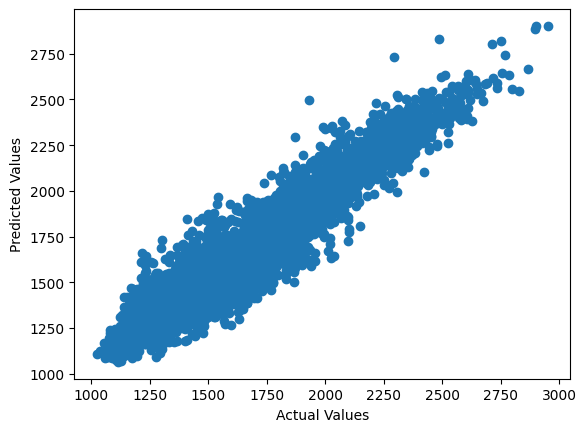

In [281]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

<Axes: xlabel='Power'>

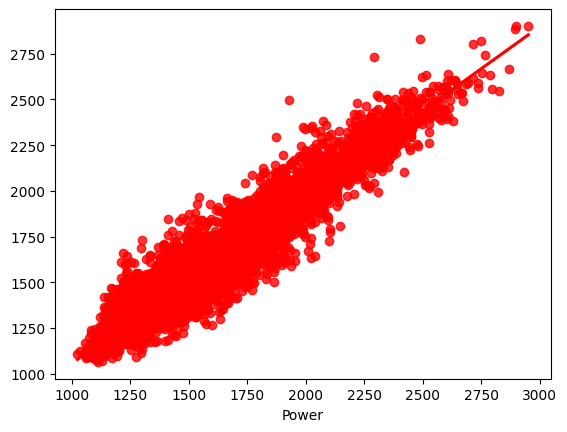

In [282]:
sns.regplot(x=y_test, y = y_pred, ci = None, color = 'red')

In [283]:
pred_df = pd.DataFrame({'Actual Values' : y_test, 'Predicted Values' : y_pred, 'Difference' : y_test - y_pred})

In [284]:
pred_df

,Actual Values,Predicted Values,Difference
29599,1535,1523.69,11.31
30399,1462,1509.42,-47.42
25047,1537,1476.29,60.71
2582,1964,1977.66,-13.66
5657,2029,1985.32,43.68
...,...,...,...
40115,1565,1626.17,-61.17
43416,1397,1333.97,63.03
17757,1756,1716.72,39.28
1837,1697,1737.30,-40.30
